In [1]:
!pip install ultralytics --quiet  # YOLOv8 official

from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 6.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.2 MB/s eta 0:00:00:00:0100:01
Creating new Ultra

In [2]:
yaml_content = """
train: /kaggle/input/bracol-for-yolov8-detection/BRACOL_REVIEWED_ANNOTATIONS/BRACOL_REVIEWED/train/images
val: /kaggle/input/bracol-for-yolov8-detection/BRACOL_REVIEWED_ANNOTATIONS/BRACOL_REVIEWED/valid/images
test: /kaggle/input/bracol-for-yolov8-detection/BRACOL_REVIEWED_ANNOTATIONS/BRACOL_REVIEWED/test/images
nc: 5
names: ["miner", "rust", "phoma", "cercospora", "healthy"]
"""

with open("bracol.yaml", "w") as f:
    f.write(yaml_content)


In [3]:
labels_dir = "/kaggle/input/bracol-for-yolov8-detection/BRACOL_REVIEWED_ANNOTATIONS/BRACOL_REVIEWED/test/labels"

for img_file in os.listdir("/kaggle/input/bracol-for-yolov8-detection/BRACOL_REVIEWED_ANNOTATIONS/BRACOL_REVIEWED/train/images"):
    label_file = os.path.join(labels_dir, img_file.replace('.jpg', '.txt'))
    # If label file exists and empty, convert to 'healthy' class label (index 4)
    if os.path.exists(label_file):
        with open(label_file, "r") as lf:
            lines = lf.readlines()
        if not lines:  # If label is empty
            with open(label_file, "w") as lf:
                lf.write("4 0.5 0.5 1.0 1.0\n")  # Healthy class; box covers full leaf


In [4]:
model = YOLO("yolov8n.pt")  # Nano variant, suitable for Kaggle

results = model.train(
    data="bracol.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    device=0,         # Use CUDA/GPU if available
    save_period=10    # Save checkpoint every 10 epochs
)

Ultralytics 8.3.205 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=bracol.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pre

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        351       1580      0.427      0.601      0.534      0.297
                 miner         25         39      0.304      0.179       0.25      0.138
                  rust         69        111      0.559      0.847       0.79      0.564
                 phoma        134        254      0.453      0.669       0.61      0.322
            cercospora        144       1176      0.393      0.707      0.485      0.163
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to /kaggle/working/runs/detect/train


In [5]:
model.save("bracol_checkpoint.pt")


image 1/1 /kaggle/input/ratata/rust.jpeg: 512x640 44 cercosporas, 38.0ms
Speed: 1.9ms preprocess, 38.0ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)
Detected classes: ['cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora', 'cercospora']


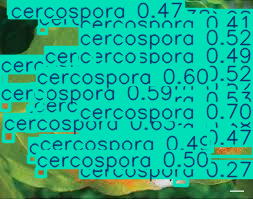

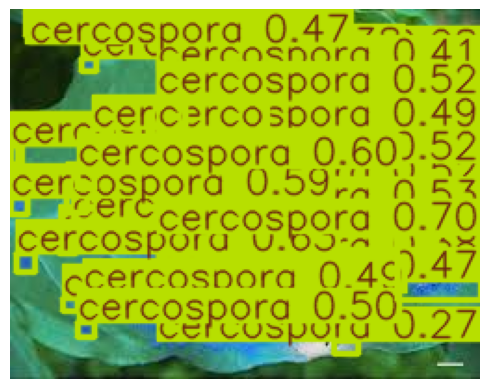

In [6]:
# Path to model weights
model_path = "/kaggle/working/runs/detect/train/weights/best.pt"

# Image path for detection
img_path = "/kaggle/input/ratata/rust.jpeg"

detect_model = YOLO(model_path)
results = detect_model(img_path)  # perform inference

# Get labels as text
label_map = ["miner", "rust", "phoma", "cercospora", "healthy"]
labels = []
for r in results:
    for c in r.boxes.cls.cpu().numpy():
        labels.append(label_map[int(c)])
print("Detected classes:", labels)

# Visualize detection
results[0].show()  # plots bbox, classes on image

# OR display with matplotlib
img_pred = results[0].plot()  # numpy array
plt.imshow(img_pred)
plt.axis('off')
plt.show()

In [ ]:
import shutil
shutil.make_archive("outputs2", 'zip', "/kaggle/working")
from IPython.display import FileLink

# Create a download link
FileLink("outputs2.zip")

